<center><img src="https://ichef.bbci.co.uk/news/800/cpsprodpb/91D1/production/_108392373_mediaitem108392372.jpg"></center>

# <center>**TITANIC**</center>

## **INDEX**

1. [Imports and Data](#import)
2. [EDA](#eda)
    1. [Overview](#overview)
    2. [Age](#age)
    3. [Survived](#class)
    4. [Heatmap](#heatmap)
3. [Models](#models)
    1. [Decision Tree](#decisiontree)
    2. [Random Forest](#randomforest)
    3. [K-Nearest-Neighbor](#knn)
3. [Submit File](#submit)

    




# **1. Imports and Data** <a id="imports"></a>

In [1]:
#importamos las librerias y comprobamos los ficheros
#import the libraries and check the files
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Cargamos los datos en dataframes
#load the data into dataframes
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")



# **2. EDA**  <a id="eda"></a>

## **2.1 overview** <a id="eda"></a>

In [3]:
#Miramos algunas filas del dataset
#We look at some rows of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Estadisticas generales
#general statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Nulos (Nulls)
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Rellenamos los valores nulos
#Fill the null values

#train
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Cabin'] = train_data['Cabin'].fillna('NotSet')
train_data['Embarked'] = train_data['Embarked'].fillna('N')
#test
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Cabin'] = test_data['Cabin'].fillna('NotSet')
test_data['Embarked'] = test_data['Embarked'].fillna('N')

## **2.2 Ages** <a id="age"></a>

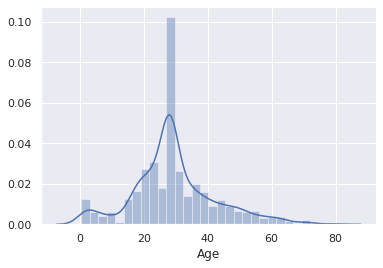

In [7]:
#distribucion de edades
#Age distribution
sns.set(color_codes=True)
sns.distplot(train_data['Age'])

## **2.3 Survived** <a id="survived"></a>

### 2.3.1 Sex

In [8]:
#supervivencia por sexo
#survival by sex
train_data[['Sex','Survived']].groupby('Sex').sum()#.values.tolist()


,Survived
Sex,
female,233
male,109


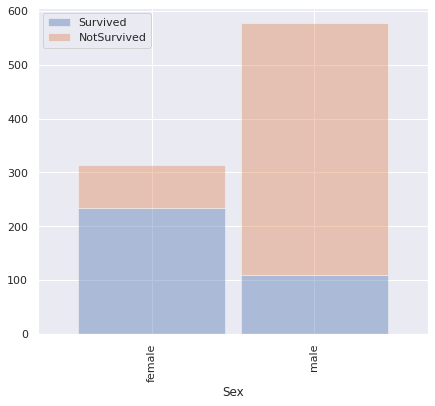

In [9]:

df_survivedsex=train_data[['Sex','Survived']]

def superviviente (row):
    if row['Survived'] == 1 :
        return 0
    else:
        return 1

df_survivedsex['NotSurvived']=df_survivedsex.apply (lambda row: superviviente(row), axis=1)

df_survivedsex=df_survivedsex.groupby('Sex').sum()

df_survivedsex.plot(kind = 'bar' 
             , stacked = 'True'          # Muestra las barras apiladas
             , alpha = 0.4               # nivel de transparencia
             , width = 0.9               # Grosor de las barras para dejar espacio entre ellas
             ,figsize=(7,6)              # Cambiamos el tamaño de la figura
            );            

### 2.3.2 Class

In [10]:
#supervivencia por clase
#survival by class
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


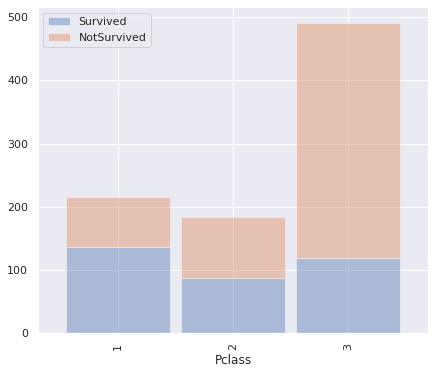

In [11]:
df_survivedclass=train_data[['Pclass','Survived']]
df_survivedclass['NotSurvived']=df_survivedclass.apply (lambda row: superviviente(row), axis=1)
df_survivedclass=df_survivedclass.groupby('Pclass').sum()

df_survivedclass.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.4,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(7,6));            # Cambiamos el tamaño de la figura


In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotSet,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotSet,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NotSet,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NotSet,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NotSet,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **2.4 Heatmap** <a id="heatmap"></a>

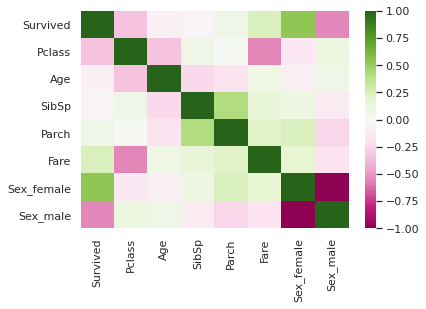

In [13]:
#Mapa de calor
#heatmap
df_mapa=train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df_mapa=pd.get_dummies(df_mapa, columns=['Sex'])
ax = sns.heatmap(df_mapa.corr(), cmap="PiYG")

# **3. Models**  <a id="models"></a>

In [14]:
#Borramos Id, Ticket y name. Pensamos que no son relevantes
#Delete Id, Ticket and name. We think they are not relevant
train_data_2 = train_data.drop(["PassengerId","Ticket","Name"], axis=1)
test_data_2 = test_data.drop(["PassengerId","Ticket","Name"], axis=1)

#Categorias a columnas
#Categories to columns
train_data_2 = pd.get_dummies(train_data_2, columns=["Sex", "Cabin", "Embarked"])
test_data_2 = pd.get_dummies(test_data_2, columns=["Sex", "Cabin", "Embarked"])

#Rellenamos los nulos con la media
#FillNa  wiith mean
train_data_2 = train_data_2.fillna(train_data_2.mean())
test_data_2 = test_data_2.fillna(test_data_2.mean())

test_data_2 = test_data_2.reindex(columns = train_data_2.columns, fill_value=0)
test_data_2=test_data_2.drop(['Survived'], axis=1)

#Separamos el dataset en entrenamiento y validación
#separate the dataset into training and validation
from sklearn.model_selection import train_test_split
#X, Y = imputeddata.drop(["Survived"], axis=1), imputeddata["Survived"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_data_2.drop(["Survived"], axis=1), train_data_2["Survived"], test_size=0.33)

# 3.1 Decision Tree <a id="decisiontree"></a>

In [15]:
from sklearn.tree import DecisionTreeClassifier

#Creamos instancia de DecisionTree
#create an instance of decisiontree
decisiontree = DecisionTreeClassifier()


In [16]:
from sklearn import tree
from graphviz import Source

#Función que retorna la visualización
#Function that returns the visualization

def plottree(decisiontree, features_names=None, class_names=None):
    """Returns a graphviz visualization of a scikit-learn decision tree
    
    Inputs
        - decisiontree: tree to visualize
        - feature_names: iterable with the names of the features present in the data.
        - class_names: iterable with the names of the classes present in the data, in increasing order.
        
    If the call to this function is the last line of a notebook cell, the tree is rendered automatically.
    """
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file=None, 
        filled=True, 
        rounded=True, 
        rotate=True,
        feature_names=features_names,
        class_names=class_names
    )
    return Source(dot_data)

In [17]:
#Entrenamos el modelo
#Train the model
decisiontree = DecisionTreeClassifier()
decisiontree.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [18]:
#Precisión del modelo
#Accuracy
from sklearn.metrics import accuracy_score

Ypred = decisiontree.predict(Xtest)
decision_tree_model_acc = accuracy_score(Ypred, Ytest) * 100
print("Accuracy:", decision_tree_model_acc)

Accuracy: 76.94915254237287


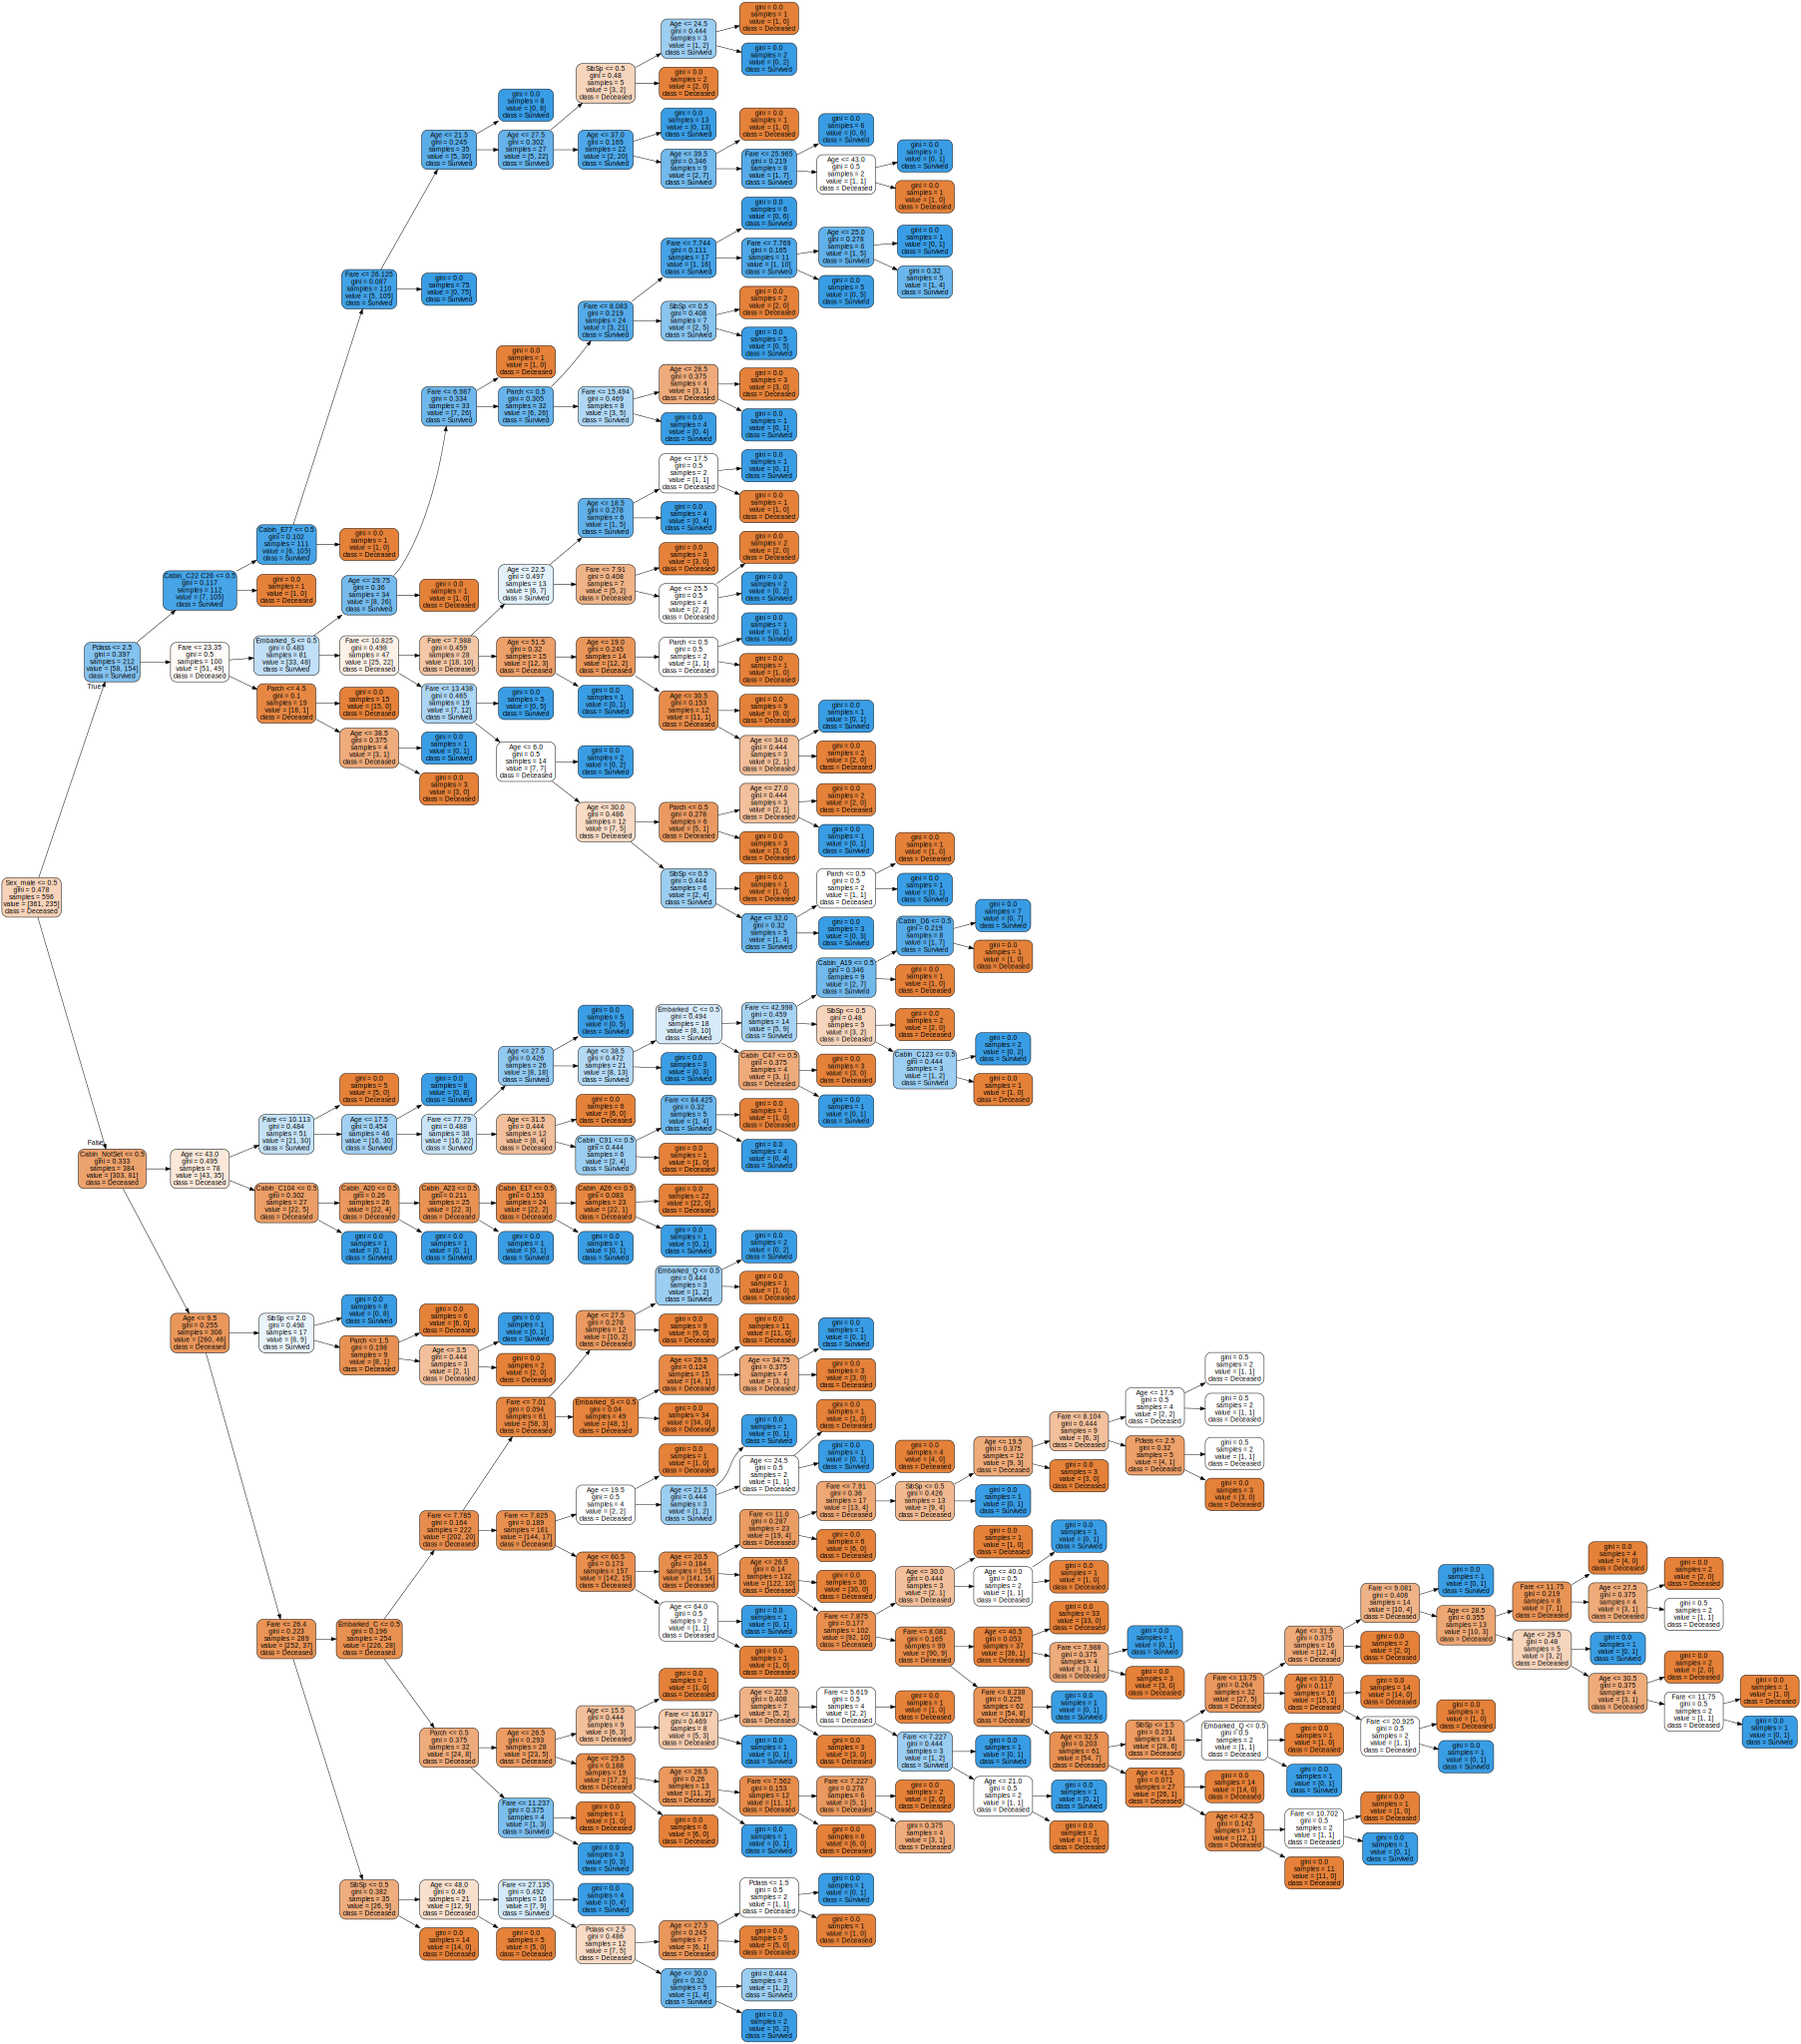

In [19]:
#Mostramos el arbol generado
#Show the generated tree
plottree(decisiontree, features_names=Xtrain.columns, class_names=["Deceased", "Survived"])

# 3.2 Random Forest <a id="randomforest"></a>

In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)

random_forest_model.fit(Xtrain, Ytrain)
Ypred = random_forest_model.predict(Xtest)
random_forest_model_acc = accuracy_score(Ypred, Ytest) * 100
print("Accuracy:", random_forest_model_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 79.66101694915254


[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.2s finished


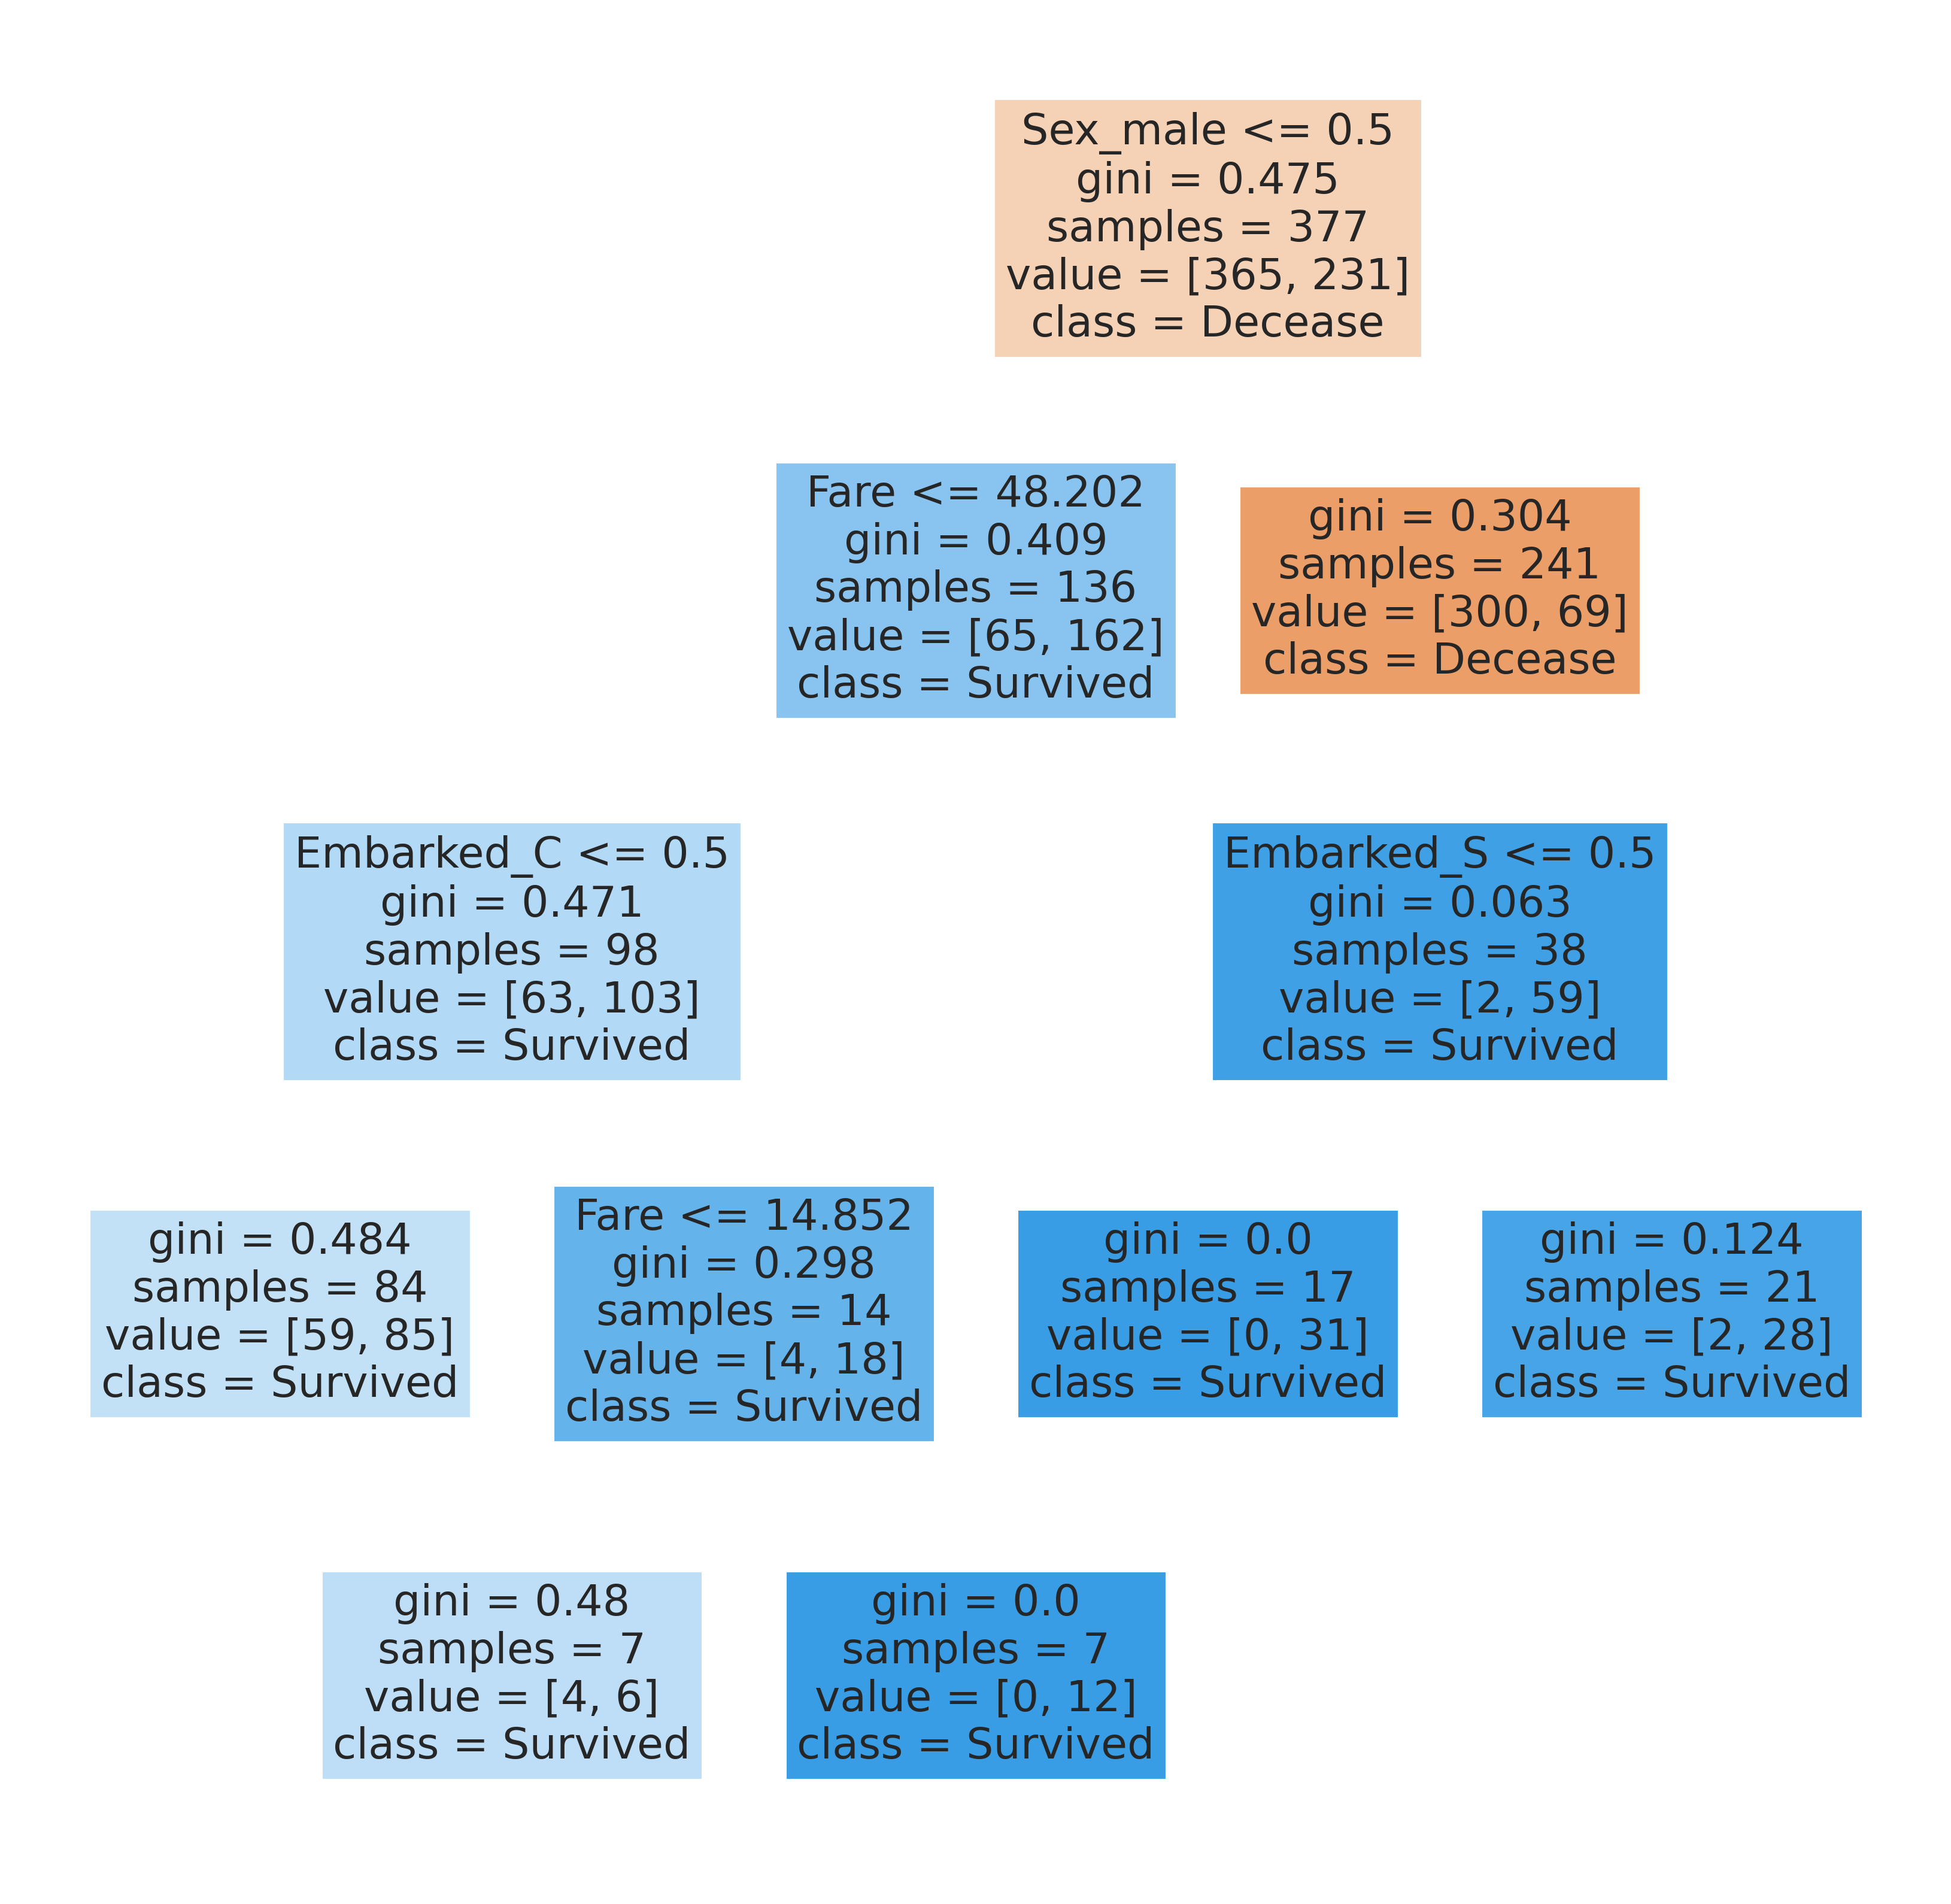

In [21]:

fn=train_data_2.drop(["Survived"], axis=1).columns.to_numpy()
cn=np.array(['Decease', 'Survived'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=800)
tree.plot_tree(random_forest_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 3.3 K-Nearest-Neighbor <a id="knn"></a>

In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,26)
scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, Ytrain)
    Ypred = knn.predict(Xtest)
    scores.append(metrics.accuracy_score(Ytest,Ypred))
print(scores)

[0.6813559322033899, 0.688135593220339, 0.7152542372881356, 0.6949152542372882, 0.6915254237288135, 0.6949152542372882, 0.6745762711864407, 0.6711864406779661, 0.6847457627118644, 0.6779661016949152, 0.6847457627118644, 0.7016949152542373, 0.6983050847457627, 0.7050847457627119, 0.6813559322033899, 0.6949152542372882, 0.6949152542372882, 0.6847457627118644, 0.6677966101694915, 0.6813559322033899, 0.6847457627118644, 0.688135593220339, 0.6779661016949152, 0.6711864406779661, 0.6779661016949152]


Text(0, 0.5, 'Testing Accuracy')

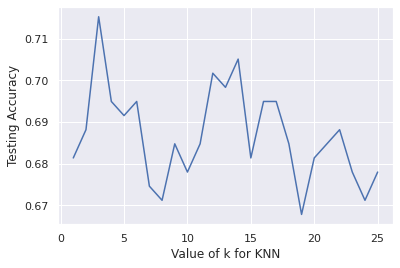

In [23]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [24]:
#K value equal 9 has the highest accuracy rate.

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain, Ytrain)
Ypred = knn.predict(Xtest)
print(metrics.accuracy_score(Ytest,Ypred))

0.6847457627118644


# **4. Submit File** <a id="submit"></a>

In [25]:
#TEST DATA
#test_data = test_data.drop(["PassengerId","Ticket","Name"], axis=1)
#test_data = pd.get_dummies(test_data, columns=["Sex", "Cabin", "Embarked"])
#test_data = test_data.fillna(test_data.mean())


Ypred = knn.predict(test_data_2)

Submission = pd.DataFrame({
"PassengerId": test_data["PassengerId"],
"Survived": Ypred
})

Submission.to_csv('my_submission.csv', index=False)